<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/main/note/10_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 ディープラーニング

**ディープラーニング**：多層の人口ニューラルネットワークを効率的に訓練する方法。

**ニューラルネットワーク**：パーセプトロンを多層に重ねたもの

**パーセプトロン**：神経細胞をモデル化したもの。複数の入力から一つの出力をする



<img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Neuron_Hand-tuned.svg" width="30%">

(wikipedia [神経細胞](https://ja.wikipedia.org/wiki/%E7%A5%9E%E7%B5%8C%E7%B4%B0%E8%83%9E))

↓モデル化

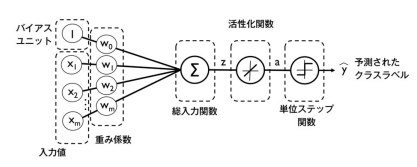

([Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://book.impress.co.jp/books/1120101017) p.335)

## 10.1 単層ニューラルネットワーク

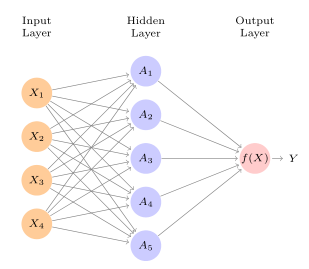

ニューラルネットワークは $p$ 要素のベクトル $X = (X_1, \dots , X_p)$ を入力にとる非線形関数 $f(X)$ として機能し、応答変数 $Y$ を出力する。

上の図では説明変数 $X_1, \dots , X_4$ が**入力層**となり、**隠れ層**へ接続されている。

このニューラルネットワークを式で表すと（$K$ は隠れ層のニューロンの数）

$$
\begin{aligned}
  Y = f(X) &= \beta_0 + \sum_{k = 1}^{K}\beta_k h_k(X)\\
  &= \beta_0 + \sum_{k = 1}^{K}\beta_k g(w_{k, 0} + \sum_{j = 0}^{p}w_{k, j} X_j)
\end{aligned}
$$

この関数は2つのステップから成る。

まず各 $k$ について $A_k$ を計算する。これは入力として $X$ をとる。

$$A_k = h_k(X) = g(w_{k, 0} + \sum_{j = 0}^{p}w_{k, j} X_j)$$

$g(z)$ は**活性化関数**と呼ばれる

その後、$A$を入力とする線形回帰を行って出力を得る。

$$f(X) = \beta_0 + \sum_{k = 1}^{K}\beta_k A_k$$

ここでは、パラメータとして$\beta_0, \dots , \beta_K, w_{1,0},\dots ,w_{K,p}$を推定する必要がある。

### 活性化関数

出力を非線形にする関数。以前は**シグモイド関数**が使われていたが、近年は**ReLU関数**が用いられることが多い。

* シグモイド関数

$$g(z) = \frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}$$

* ReLU関数

$$
g(z) = (z)_+ = 
\begin{cases}
  0 & \textrm{if}~~z < 0 \\
  z & \textrm{otherwise.}
\end{cases}
$$

活性化関数は非線形であることが重要で、もし線形なものをを使うと多層にする意味がなくなる。

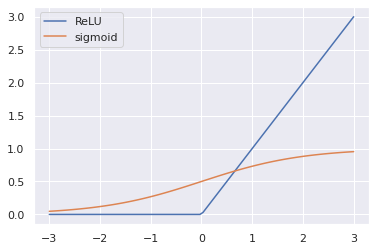

In [2]:
from math import exp

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()


def relu(z):
    return max(z, 0)


def sigmoid(z):
    return 1 / (1 + exp(-z))


x = np.linspace(-3, 3, 100)
y_relu = np.array([relu(xi) for xi in x])
y_sigmoid = np.array([sigmoid(xi) for xi in x])
fig, ax = plt.subplots()
ax.plot(x, y_relu, label="ReLU")
ax.plot(x, y_sigmoid, label="sigmoid")
ax.legend()

plt.show()


学習をするうえでの損失関数としては二乗誤差が使われる事が多い。